In [ ]:
import pandas as  pd
import seaborn as sns
import matplotlib as plt
import numpy as np
df=pd.read_csv('boat_data.csv')
df.dropna()

In [439]:
# Price conversion --> to EUR
# 1 CHF (Schweize Franken) = 1,02 EUR
# 1 Â£ = 1.15 EUR
# 1 DKK (Dänische Krone)= 0.13 EUR
# df.corr()

# Split Currency and Amount from each other
df['Currency']=df['Price'].str[:3]
df['Amount']=df['Price'].str[4:10].str.strip().astype(int)
# Convert to EUR
cur_dict={
    'CHF':1.02,'Â£ ':1.15, 'DKK':0.13,'EUR':1
}
df.replace({'Currency':cur_dict},inplace=True)
df['Price_EUR']=df['Currency']*df['Amount']
df.sample(20)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Amount,Price_EUR
8597,EUR 35000,Motor Yacht,Princess power boats,"Used boat,Diesel",1987,11.50,3.65,NaN,Italy,382,1.00,35000,35000.0
9180,EUR 22900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1994,6.57,2.43,GRP,Austria,172,1.00,22900,22900.0
5008,EUR 239000,Trawler,Smelne power boats,Used boat,2001,14.25,4.20,Steel,Netherlands,39,1.00,239000,239000.0
7939,EUR 49500,Sport Boat,Crownline power boats,"Used boat,Unleaded",2007,8.00,2.00,GRP,Croatia,271,1.00,49500,49500.0
3702,EUR 945000,Motor Yacht,NaN,Used boat,2011,17.58,4.90,NaN,Italy,240,1.00,945000,945000.0
4209,EUR 440000,Motor Yacht,Fairline power boats,"Used boat,Diesel",2006,18.88,4.75,GRP,Croatia,37,1.00,440000,440000.0
6774,EUR 85000,Motor Yacht,BÃ©nÃ©teau power boats,Used boat,2011,10.60,3.30,NaN,Malta,65,1.00,85000,85000.0
470,EUR 25900,Motor Yacht,Fairline power boats,"Used boat,Diesel",1981,9.90,9.90,GRP,Germany,140,1.00,25900,25900.0
9440,EUR 16900,Cabin Boat,Marinello power boats,new boat from stock,2015,5.70,2.35,GRP,Germany,259,1.00,16900,16900.0
2095,EUR 148500,Motor Yacht,Chris Craft power boats,Used boat,2017,8.13,2.60,GRP,Netherlands,67,1.00,148500,148500.0


In [440]:
# Categorize Prices
df['Price_EUR'].describe()
# 25th percentile 40,000 EUR
# 50th percentile 87,720 EUR --> median
# 75th percentile 199,937 EUR
# max= 1,144,250
# Categories= Under 45K (0-45K) / Cheap (45K-160K) / Average (160K-220K)/ Expensive(220K-500K)/ Very Expensive  (500K and above)
price_category=pd.cut(df['Price_EUR'],bins=[0,45001,160001,220001,500001,1144250],labels=
['Under 45K','Cheap','Average','Expensive','Very Expensive']) 
df.insert(1,'EUR Price Group',price_category)


In [441]:
# Split Boat types
df[['Boat Type-Main','Boat Type 2','Boat Type 3']]=df['Boat Type'].str.split(',',expand=True)
# Split Type (Condition/Fuel Type)
df[['Condition','Fuel Type']]=df['Type'].str.split(',',expand=True)
# Boat age
df['Age'] = 2022 - df['Year Built']
df['Age'] = df['Age'].replace(2022, 0) # Replace 2022 with 0
# df['Age'].describe()
# Categorizing Age (0-5) / (5-16) / (16-26) / (26-51) / (51-100) / (137+)
age_category=pd.cut(df.Age,bins=[0,5,16,26,51,101,137],
labels=['0-4 years','5-15 years','16-25 years','26-50 years','51-100 years','101+ years'])
df.insert(19,'Age Group',age_category)

In [442]:
# Categorizing Views
# df['Number of views last 7 days'].describe()
views_category=pd.cut(df['Number of views last 7 days'],bins=[0,71,111,176,1301,3263],
labels=['Low','Medium','Above average','Good','Best'])
df.insert(21,'View_group',views_category)


In [443]:
# Location
df['Location']=df['Location'].str.replace('\d+','') # remove digits
# df['Location']=df['Location'].str.replace('Ã','')  # remove Ã / Â
# df['Location'].str.contains('Ã').sum()
df=df.replace('Ã',np.nan,regex=True)
df=df.replace('Â',np.nan,regex=True)
# Remove 'Ã' from Manufacturer
# df['Manufacturer']=df['Manufacturer'].str.replace('Ã','') # remove Ã


C:\Users\Estorko\AppData\Local\Temp\ipykernel_19708\701937101.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location']=df['Location'].str.replace('\d+','') # remove digits


In [447]:
df['Manufacturer'].str.contains('Ã').sum()
df['Location'].str.contains('Ã').sum()
df.head()


,Price,EUR Price Group,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,...,Amount,Price_EUR,Boat Type-Main,Boat Type 2,Boat Type 3,Condition,Fuel Type,Age Group,Age,View_group
0,CHF 3337,Under 45K,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,...,3337,3403.74,Motor Yacht,None,None,new boat from stock,None,0-4 years,5,Good
1,EUR 3490,Under 45K,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,...,3490,3490.00,Center console boat,None,None,new boat from stock,None,0-4 years,2,Medium
2,CHF 3770,Under 45K,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,...,3770,3845.40,Sport Boat,None,None,new boat from stock,None,NaN,0,Above average
3,DKK 25900,Under 45K,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,...,25900,3367.00,Sport Boat,None,None,new boat from stock,None,0-4 years,2,Low
4,EUR 3399,Under 45K,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,...,3399,3399.00,Fishing Boat,None,None,new boat from stock,None,0-4 years,3,Low


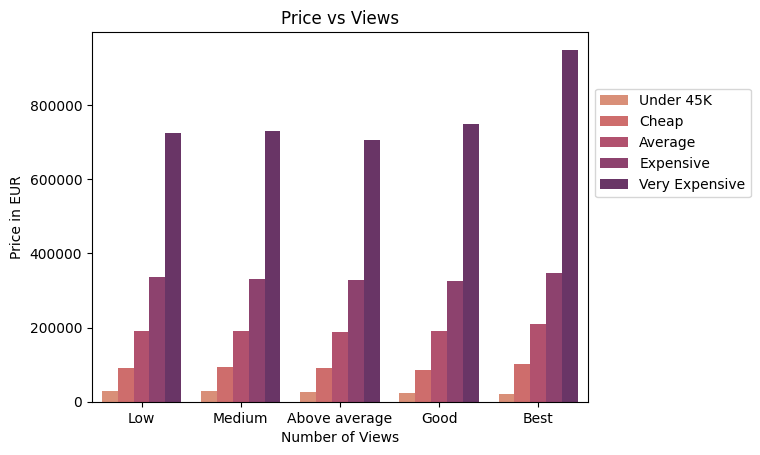

In [472]:
# Analyzing the Market / Data
# 1.) Price vs Number of Views
fig=sns.barplot(x='View_group',y='Price_EUR',data=df,ci=False,palette='flare',hue='EUR Price Group')
fig.set(xlabel='Number of Views',ylabel='Price in EUR',title='Price vs Views')
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))

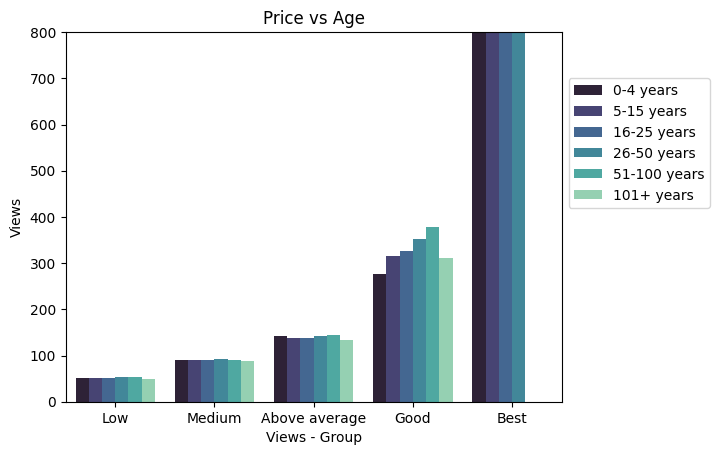

In [479]:
# 2.) Years vs Views
fig=sns.barplot(x='View_group',y='Number of views last 7 days',data=df,ci=False,palette='mako',hue='Age Group')
fig.set(xlabel='Views - Group',ylabel='Views',title='Price vs Age')
fig.legend(loc='center left',bbox_to_anchor=(1, 0.7))